<img src = "https://slitayem.github.io/img/blog/2020-08-04/churn.png" width=50%>

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Prepare Data

In [2]:
data = pd.read_csv("/content/Churn.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Data Preprocessing

In [5]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data.drop("RowNumber", axis=1, inplace=True)
data.drop("CustomerId", axis=1, inplace=True)
data.drop("Surname", axis=1, inplace=True)

In [8]:
data['Gender'] = data['Gender'].replace({'Female':1,'Male':0})

In [9]:
data['Geography'].unique()


array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
dummies = pd.get_dummies(data['Geography'])
dummies

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [11]:
data = pd.concat([data, dummies], axis=1)
data.drop('Geography', axis=1, inplace=True)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = data.drop('Exited', axis=True)
Y = data['Exited']
X = sc.fit_transform(X)

## Strorytelling - Visualization

In [18]:
pd.crosstab(data['Gender'], data['Exited'])

Exited,0,1
Gender,,
0,4559,898
1,3404,1139


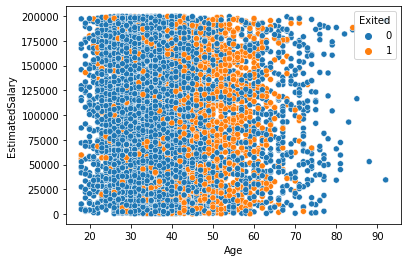

In [23]:
sns.scatterplot(x=data['Age'] , y=data['EstimatedSalary'], hue=data['Exited'])

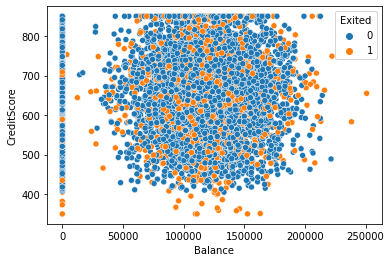

In [25]:
sns.scatterplot(x=data['Balance'] , y=data['CreditScore'], hue=data['Exited'])

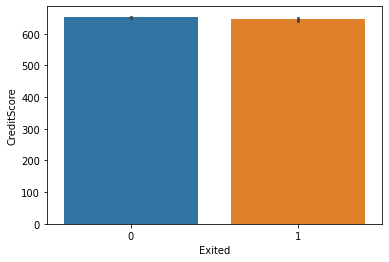

In [26]:
sns.barplot(x=data['Exited'], y=data['CreditScore'])

## Prepare Data for Machine learning

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

## Train your model

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

models = [LogisticRegression(), RandomForestClassifier(), SVC(), GaussianNB()]

for model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred) * 100
  print (model, "Accuracy : ", accuracy)

LogisticRegression() Accuracy :  81.10000000000001
RandomForestClassifier() Accuracy :  86.55000000000001
SVC() Accuracy :  85.6
GaussianNB() Accuracy :  82.8


Text(0, 0.5, 'Error Rate')

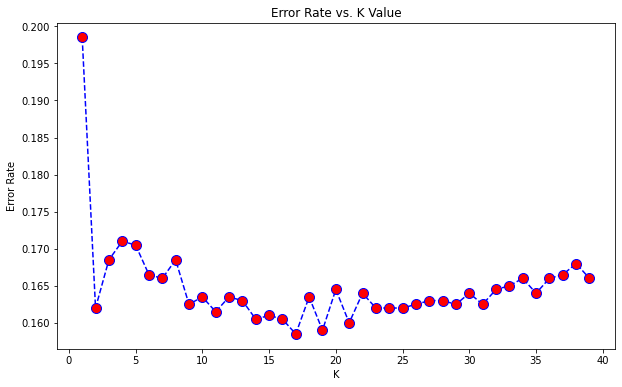

In [43]:
error_rate = []
# Might take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [45]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [46]:
knn.score(X_train, y_train)


0.84275

In [47]:
knn.score(X_test, y_test)

0.8395

#Save Your Final Model

In [51]:
import joblib

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
joblib.dump(rf, "my_random_forest.joblib")

['my_random_forest.joblib']

# So best classifier in sklearn is RandomForrest and SVC
## now we try Deep Learning (ANN)

In [ ]:
!pip install tensorflow==2.4.0

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [32]:
print(X_train.shape, y_train.shape)

(8000, 12) (8000,)


In [52]:
ann = Sequential()
ann.add(Dense(12, activation="sigmoid"))
ann.add(Dense(48, activation="sigmoid"))
ann.add(Dense(24, activation="sigmoid"))
ann.add(Dense(12, activation="sigmoid"))
ann.add(Dense(1, activation="sigmoid"))

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

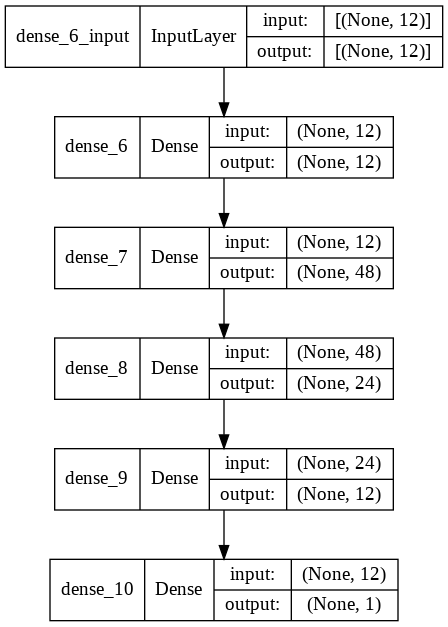

In [58]:
from keras.utils.vis_utils import plot_model
plot_model(ann, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [53]:
ann.fit(X_train, y_train, epochs=250, batch_size=8)

1000/1000 [==============================] - 4s 4ms/step - loss: 0.3175 - accuracy: 0.8690
Epoch 238/250
1000/1000 [==============================] - 4s 4ms/step - loss: 0.3173 - accuracy: 0.8706
Epoch 239/250
1000/1000 [==============================] - 4s 4ms/step - loss: 0.3171 - accuracy: 0.8679
Epoch 240/250
1000/1000 [==============================] - 4s 4ms/step - loss: 0.3169 - accuracy: 0.8691
Epoch 241/250
1000/1000 [==============================] - 4s 4ms/step - loss: 0.3180 - accuracy: 0.8719
Epoch 242/250
1000/1000 [==============================] - 4s 4ms/step - loss: 0.3174 - accuracy: 0.8683
Epoch 243/250
1000/1000 [==============================] - 4s 4ms/step - loss: 0.3174 - accuracy: 0.8680
Epoch 244/250
1000/1000 [==============================] - 4s 4ms/step - loss: 0.3176 - accuracy: 0.8683
Epoch 245/250
1000/1000 [==============================] - 4s 4ms/step - loss: 0.3168 - accuracy: 0.8690
Epoch 246/250
1000/1000 [==============================] - 3s 3ms/ste

## Test the model and show the metrics

### دقت ann با رندوم فارست تفاوت چندانی نداشت

## Save your final model

In [59]:
ann.save("ann_model")


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unknown node type <gast.gast.Expr object at 0x7f89d53b8a10>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unknown node type <gast.gast.Expr object at 0x7f89d53b8a10>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: ann_model/assets


## Send us the Result (Maktabkhoone)